# **Load the dataset**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving liver_cirrhosis.csv to liver_cirrhosis.csv


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore")

# Assuming the dataset is already loaded in 'data'
data.head()




,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


# **Step 1: Exploratory Data Analysis (EDA)**
# **Basic Data Exploration**

In [7]:
# Check for missing values
print(data.isnull().sum())

# Display basic statistics
print(data.describe())

# Check data types
print(data.info())


N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64
             N_Days           Age     Bilirubin   Cholesterol       Albumin  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean    1887.117040  18495.877080      3.402644    372.331471      3.486578   
std     1091.690918   3737.596616      4.707491    193.668452      0.380488   
min       41.000000   9598.000000      0.300000    120.000000      1.960000   
25%     1080.000000  15694.000000      0.800000    275.000000      3.290000   
50%     1680.000000  18499.000000      1.300000    369.510563      3.510000   
75%     2576.000000  20955.000000      3.400000    369.510563      3.7500

# **Data Visualization**


In [12]:
print(data.columns)



Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')


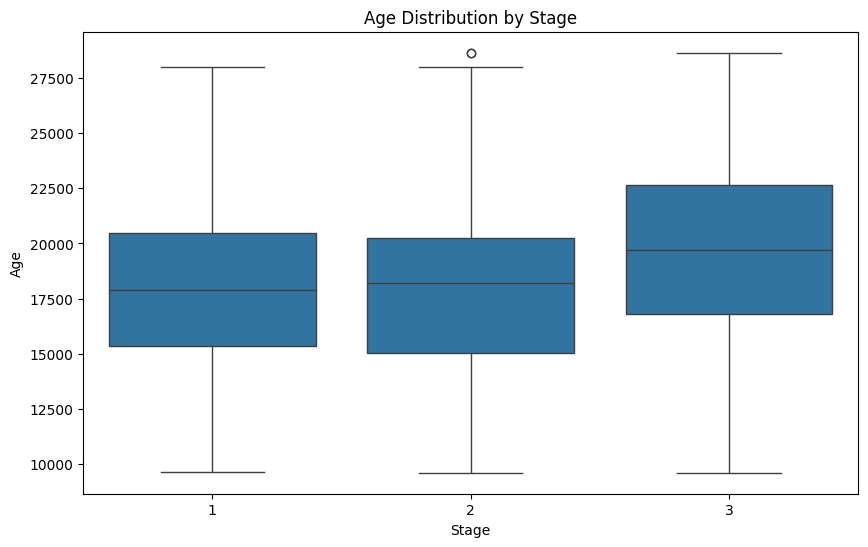

In [13]:
# Outlier Detection (adjust column name if necessary)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Stage'], y=data['Age'], data=data)
plt.title('Age Distribution by Stage')
plt.show()

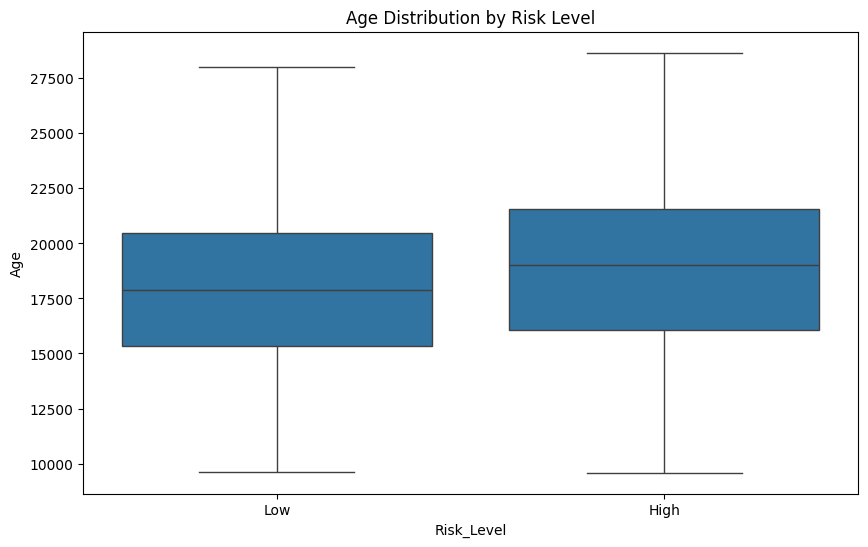

In [14]:
# Create a simple Risk_Level based on 'Stage' or any other column
data['Risk_Level'] = np.where(data['Stage'] >= 2, 'High', 'Low')

# Now, you can run the boxplot code again
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Risk_Level'], y=data['Age'], data=data)
plt.title('Age Distribution by Risk Level')
plt.show()


# **Step 2: Data Cleaning and Preprocessing**
# **Handling Missing Values**

In [20]:
# Fill missing values with mean for numerical columns or mode for categorical
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Risk_Level'].fillna(data['Risk_Level'].mode()[0], inplace=True)
print(data.isnull().sum())
print(data.head())
print("Mode of Risk_Level before filling:", data['Risk_Level'].mode()[0])



N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Risk_Level       0
dtype: int64
   N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0  

# **Encoding Categorical Variables**

In [28]:
# Label Encoding for categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Use the correct column name
data['Risk_Level'] = label_encoder.fit_transform(data['Risk_Level'])

print(data[['Sex', 'Risk_Level']].head())

print("Unique values in 'Sex':", data['Sex'].unique())
print("Unique values in 'Risk_Level':", data['Risk_Level'].unique())

print(data.dtypes)


   Sex  Risk_Level
0    0           1
1    1           0
2    0           0
3    0           0
4    0           1
Unique values in 'Sex': [0 1]
Unique values in 'Risk_Level': [1 0]
N_Days             int64
Status            object
Drug              object
Age                int64
Sex                int64
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
Risk_Level         int64
dtype: object


# **Feature Scaling**

In [33]:
# Standardize numerical features
scaler = StandardScaler()

# Select columns that are numerical
numerical_cols = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Apply standardization to the selected numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Check the first few rows of the transformed numerical features
print(data[numerical_cols].head())


        Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0  0.000836  -0.616613    -1.153187  1.454532  1.732843 -0.776983 -1.475838   
1  0.328593  -0.616613    -0.791737  1.165424 -1.068339 -0.740849 -1.637106   
2 -1.781094  -0.616613    -0.270217  0.140406 -0.672074 -0.418421 -0.015003   
3 -0.542840  -0.574127    -0.605849  0.666056 -1.054675 -0.540165 -0.956430   
4  0.857018  -0.319209     0.586935  0.140406 -0.357795 -0.524599 -0.307170   

   Tryglicerides  Platelets  Prothrombin     Stage  
0      -1.265931  -0.000074    -0.922747 -1.230147  
1      -0.924927  -0.364901     0.072368 -0.001425  
2      -0.830204  -0.314231    -0.812179 -0.001425  
3      -1.246986  -1.064152    -0.591042 -0.001425  
4      -0.280808  -1.064152     0.846347 -1.230147  


# **Step 3: Data Splitting**

In [36]:
# Define X and y for classification (target: Risk_Level)
X = data.drop(columns=['Risk_Level', 'N_Days'])  # Assuming 'Risk_Level' is the target and 'N_Days' is irrelevant
y_class = data['Risk_Level']

# Split the data into training and test sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Optional: if you want to treat 'Disease_Progression' as another target for regression, do the same for regression
# y_reg = data['Disease_Progression']  # You need to replace 'Disease_Progression' with an actual column name if exists
# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
print(f"X_train_class shape: {X_train_class.shape}")
print(f"X_test_class shape: {X_test_class.shape}")
print(f"y_train_class shape: {y_train_class.shape}")
print(f"y_test_class shape: {y_test_class.shape}")


X_train_class shape: (20000, 18)
X_test_class shape: (5000, 18)
y_train_class shape: (20000,)
y_test_class shape: (5000,)


# **Step 5: Model Training and Evaluation**
# **Classification Models**

In [42]:
# Perform one-hot encoding on categorical columns
X = pd.get_dummies(X, drop_first=True)  # Drop the first category to avoid multicollinearity

# Now split the data again with the updated X
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)


# Initialize models for classification
log_reg = LogisticRegression()
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(probability=True)
dt_classifier = DecisionTreeClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()

# Dictionary to store models and their names
classifiers = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_classifier,
    'Support Vector Machine': svm_classifier,
    'Decision Tree': dt_classifier,
    'K-Nearest Neighbors': knn_classifier
}

# Training and evaluating each model
for name, model in classifiers.items():
    model.fit(X_train_class, y_train_class)
    y_pred = model.predict(X_test_class)
    print(f"{name} - Accuracy: {accuracy_score(y_test_class, y_pred)}")
    print(f"{name} - Classification Report:\n{classification_report(y_test_class, y_pred)}")


Logistic Regression - Accuracy: 1.0
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3343
           1       1.00      1.00      1.00      1657

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Random Forest - Accuracy: 1.0
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3343
           1       1.00      1.00      1.00      1657

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Support Vector Machine - Accuracy: 0.9996
Support Vector Machine - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      33

# **Regression Model**

1. Select the Target Variable
2. Split Data for Regression
3. Standardize
4. Train and Evaluate the Regression Model

In [45]:
# Define features and target for regression (using 'Stage' as the target for progression analysis)
X_reg = X  # X already excludes 'Risk_Level' and 'N_Days', so it should contain only features
y_reg = data['Stage']  # Using 'Stage' as the target variable for regression

# Split the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [46]:
# Train and evaluate a regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train_reg, y_train_reg)

# Predict on the test set
y_pred_reg = rf_regressor.predict(X_test_reg)

# Calculate and print the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print(f"Random Forest Regression - RMSE: {rmse}")


Random Forest Regression - RMSE: 5.753694716273711e-14


In [47]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate additional evaluation metrics
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Squared: {r2}")


Mean Absolute Error (MAE): 4.654714716965935e-14
R-Squared: 1.0


# **Clustering and Segmentation**

Step 1: Prepare Data for Clustering

In [49]:
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
clustering_features = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Standardize these features
scaler = StandardScaler()
data_clustering = scaler.fit_transform(data[clustering_features])

# Display the first few rows of the standardized clustering data
pd.DataFrame(data_clustering, columns=clustering_features).head()


,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,0.000836,-0.616613,-1.153187,1.454532,1.732843,-0.776983,-1.475838,-1.265931,-0.000074,-0.922747
1,0.328593,-0.616613,-0.791737,1.165424,-1.068339,-0.740849,-1.637106,-0.924927,-0.364901,0.072368
2,-1.781094,-0.616613,-0.270217,0.140406,-0.672074,-0.418421,-0.015003,-0.830204,-0.314231,-0.812179
3,-0.542840,-0.574127,-0.605849,0.666056,-1.054675,-0.540165,-0.956430,-1.246986,-1.064152,-0.591042
4,0.857018,-0.319209,0.586935,0.140406,-0.357795,-0.524599,-0.307170,-0.280808,-1.064152,0.846347


# **Apply K-Means Clustering**

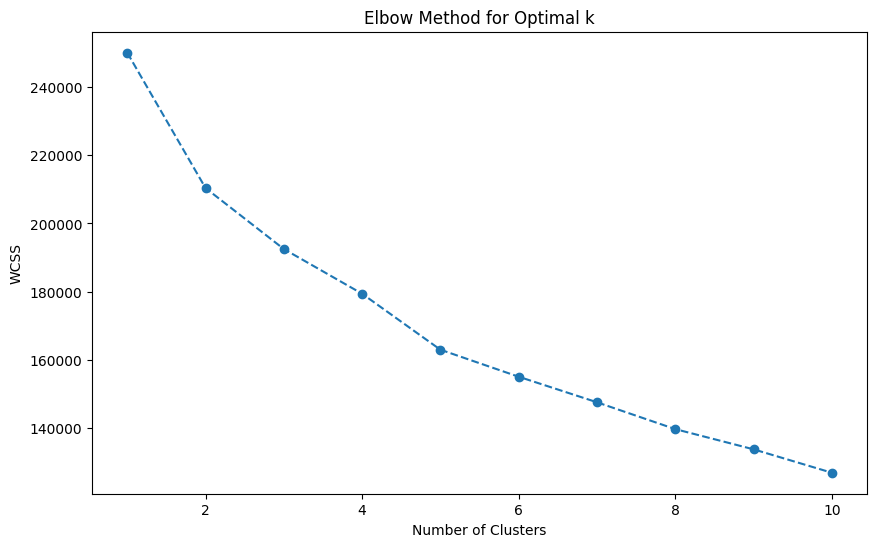

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_clustering)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to the nearest cluster center

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


# **: Fit the K-Means Model**

In [55]:
# Apply K-Means with the optimal number of clusters
optimal_k = 3  # Use the number of clusters you found from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_clustering)  # Adding cluster labels to the original dataset

# Display cluster assignments
print(kmeans.labels_)



[0 0 0 ... 1 0 0]


# **: Analyze and Visualize the Clusters**

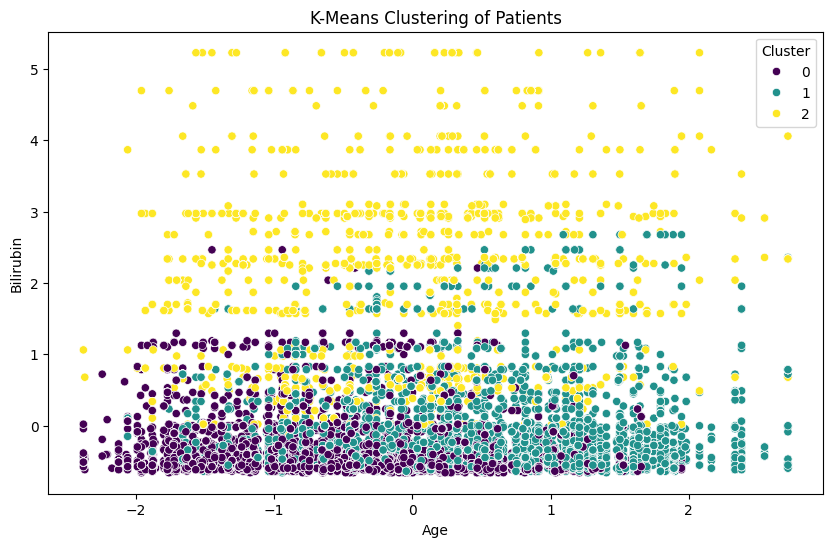

Cluster Summary:
               Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
Cluster                                                                   
0       -0.447740  -0.365321    -0.228842  0.477862 -0.324354 -0.269485   
1        0.593954  -0.154998    -0.140748 -0.436620  0.065189  0.270190   
2       -0.051981   2.200299     1.531368 -0.636293  1.242454  0.274807   

             SGOT  Tryglicerides  Platelets  Prothrombin  
Cluster                                                   
0       -0.379584      -0.191075   0.360140    -0.341443  
1        0.210767      -0.085626  -0.423921     0.299624  
2        0.982495       1.166808  -0.146926     0.497954  


In [56]:
import seaborn as sns

# Visualizing the clusters on a 2D plot (using two features for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Bilirubin', hue='Cluster', data=data, palette='viridis', legend='full')
plt.title('K-Means Clustering of Patients')
plt.show()

# Check the mean values of features within each cluster
cluster_summary = data.groupby('Cluster')[clustering_features].mean()
print("Cluster Summary:\n", cluster_summary)


# **: Interpret the Clusters**

In [57]:
# Cluster Summary interpretation
cluster_summary = data.groupby('Cluster')[clustering_features].mean()

# Display the cluster summary table
print("Cluster Summary:\n", cluster_summary)

# Interpret the clusters based on feature values

# Cluster 0: Interpreting its characteristics
cluster_0_summary = cluster_summary.loc[0]
print("\nCluster 0 Characteristics:")
print(f"Age: {cluster_0_summary['Age']:.2f} (Younger patients)")
print(f"Bilirubin: {cluster_0_summary['Bilirubin']:.2f} (Lower bilirubin levels, possibly better liver function)")
print(f"Albumin: {cluster_0_summary['Albumin']:.2f} (Higher levels, indicating better liver function)")
print(f"Prothrombin: {cluster_0_summary['Prothrombin']:.2f} (Normal clotting function)")

# Cluster 1: Interpreting its characteristics
cluster_1_summary = cluster_summary.loc[1]
print("\nCluster 1 Characteristics:")
print(f"Age: {cluster_1_summary['Age']:.2f} (Older patients)")
print(f"Bilirubin: {cluster_1_summary['Bilirubin']:.2f} (Moderate bilirubin levels)")
print(f"Albumin: {cluster_1_summary['Albumin']:.2f} (Lower levels, indicating possible liver damage)")
print(f"Platelets: {cluster_1_summary['Platelets']:.2f} (Lower platelets, suggesting liver disease progression)")

# Cluster 2: Interpreting its characteristics
cluster_2_summary = cluster_summary.loc[2]
print("\nCluster 2 Characteristics:")
print(f"Bilirubin: {cluster_2_summary['Bilirubin']:.2f} (High bilirubin levels, indicating liver damage)")
print(f"Albumin: {cluster_2_summary['Albumin']:.2f} (Lower albumin levels, indicating liver dysfunction)")
print(f"SGOT: {cluster_2_summary['SGOT']:.2f} (High levels, suggesting liver inflammation or stress)")
print(f"Tryglicerides: {cluster_2_summary['Tryglicerides']:.2f} (Elevated levels, could indicate metabolic issues)")

# Summary of the clusters
print("\nCluster 0 Summary: Likely represents younger patients with healthier liver function markers.")
print("Cluster 1 Summary: Likely includes older patients with moderate liver disease progression signs.")
print("Cluster 2 Summary: Likely includes patients with advanced liver disease markers and may represent the highest-risk group.")


Cluster Summary:
               Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
Cluster                                                                   
0       -0.447740  -0.365321    -0.228842  0.477862 -0.324354 -0.269485   
1        0.593954  -0.154998    -0.140748 -0.436620  0.065189  0.270190   
2       -0.051981   2.200299     1.531368 -0.636293  1.242454  0.274807   

             SGOT  Tryglicerides  Platelets  Prothrombin  
Cluster                                                   
0       -0.379584      -0.191075   0.360140    -0.341443  
1        0.210767      -0.085626  -0.423921     0.299624  
2        0.982495       1.166808  -0.146926     0.497954  

Cluster 0 Characteristics:
Age: -0.45 (Younger patients)
Bilirubin: -0.37 (Lower bilirubin levels, possibly better liver function)
Albumin: 0.48 (Higher levels, indicating better liver function)
Prothrombin: -0.34 (Normal clotting function)

Cluster 1 Characteristics:
Age: 0.59 (Older patients)
Bilirubin: -0.

# ** Export the Segmented Data**



In [60]:
# Export the updated data with cluster labels to a CSV file
data.to_csv('segmented_liver_cirrhosis_data.csv', index=False)

# If you want to download it directly in Google Colab
from google.colab import files
files.download('segmented_liver_cirrhosis_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Step 6: Hyperparameter Tuning ** **bold text**



In [65]:
# Hyperparameter tuning with Grid Search
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_class, y_train_class)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Best Score: 1.0


# **Step 7: Exporting Processed Data**

In [71]:
# Export the processed data and prediction results to an Excel file
data.to_excel('processed_data.xlsx', index=False)


In [73]:
# Replace 'data' with your actual main DataFrame variable if it's named differently.
main_data = data  # or replace 'data' with the actual name, like df or final_df

# Check if there are predictions to add; otherwise, use main_data directly
if 'predictions' in locals():  # If 'predictions' exists, combine it with main data
    final_export = pd.concat([main_data, predictions], axis=1)
else:
    final_export = main_data  # Use main data directly if no predictions to add

# Export to Excel
final_export.to_excel("processed_data.xlsx", index=False)

# Download if in Google Colab
from google.colab import files
files.download("processed_data.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>